In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
shipping_data = pd.read_csv("/content/Drafttable.csv")

shipping_df = pd.DataFrame(shipping_data)

In [8]:
shipping_df.head()

,Delivery_Status,Order_Id,Order_Region,Order_Item_Total,Order_Profit_Per_Order
0,Shipping canceled,75935,Oceania,294.980011,18.580000
1,Late delivery,75918,Oceania,298.250000,22.370001
2,Late delivery,75915,Oceania,285.140015,131.169998
3,Advance shipping,75911,Eastern Asia,268.760010,23.650000
4,Late delivery,75924,Eastern Asia,321.200012,-246.360001


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
len(shipping_df)

180519

In [16]:
region_df = shipping_df.groupby('Order_Region')

region_df


In [17]:
region_df = shipping_df.groupby(['Order_Region', 'Order_Profit_Per_Order', 'Delivery_Status']).size().sort_values(ascending=False)

region_df



Order_Region     Order_Profit_Per_Order  Delivery_Status  
Western Europe   0.000000                Late delivery        113
Central America  0.000000                Late delivery        100
South America    0.000000                Late delivery         55
Central America  0.000000                Advance shipping      44
                                         Shipping on time      35
                                                             ... 
Northern Europe  29.740000               Shipping on time       1
                 29.730000               Advance shipping       1
                 29.719999               Shipping on time       1
                 29.690001               Shipping canceled      1
Western Europe   911.799988              Late delivery          1
Length: 132764, dtype: int64

In [20]:
region_deliveries_df = shipping_df.groupby(['Delivery_Status', 'Order_Region']).size().sort_values(ascending=False)

region_deliveries_df

Delivery_Status    Order_Region   
Late delivery      Central America    15518
                   Western Europe     15140
                   South America       8111
Advance shipping   Central America     6566
                   Western Europe      6138
                                      ...  
Shipping canceled  East Africa           71
                   Central Africa        61
                   Southern Africa       57
                   Canada                52
                   Central Asia          11
Length: 92, dtype: int64

In [42]:
region_df = region_deliveries_df.reset_index(name='count')
region_df

,Delivery_Status,Order_Region,count
0,Late delivery,Central America,15518
1,Late delivery,Western Europe,15140
2,Late delivery,South America,8111
3,Advance shipping,Central America,6566
4,Advance shipping,Western Europe,6138
...,...,...,...
87,Shipping canceled,East Africa,71
88,Shipping canceled,Central Africa,61
89,Shipping canceled,Southern Africa,57
90,Shipping canceled,Canada,52


In [51]:
region_df.Order_Region.value_counts()

Order_Region
Central America    4
West Asia          4
Canada             4
Southern Africa    4
Central Africa     4
East Africa        4
North Africa       4
West Africa        4
Eastern Europe     4
South of  USA      4
US Center          4
East of USA        4
Western Europe     4
Eastern Asia       4
West of USA        4
South Asia         4
Caribbean          4
Southern Europe    4
Northern Europe    4
Southeast Asia     4
Oceania            4
South America      4
Central Asia       4
Name: count, dtype: int64

In [74]:
late_bool_mask = region_df.Delivery_Status.str.contains('Late delivery')
late_df = region_df[late_bool_mask]

len(late_df)

23

<Axes: xlabel='Order_Region'>

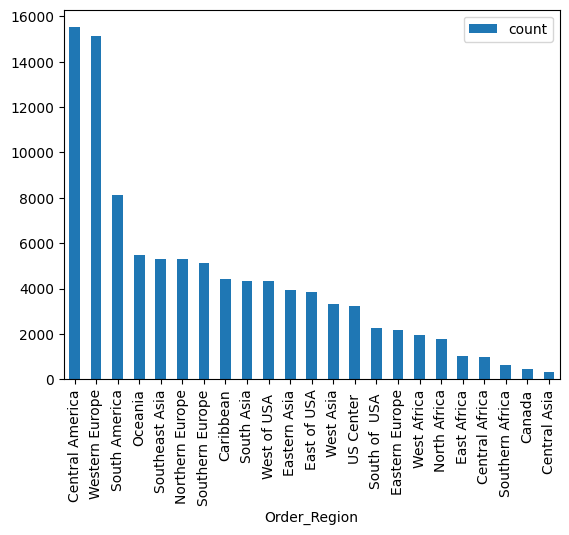

In [75]:
late_df.plot(x='Order_Region', y='count', kind='bar')

In [73]:
on_time_bool_mask = region_df.Delivery_Status.str.contains('Shipping on time')
on_time_df = region_df[on_time_bool_mask]

on_time_df = on_time_df.drop(columns=['Delivery_Status'])

len(on_time_df)

23

<Axes: xlabel='Order_Region'>

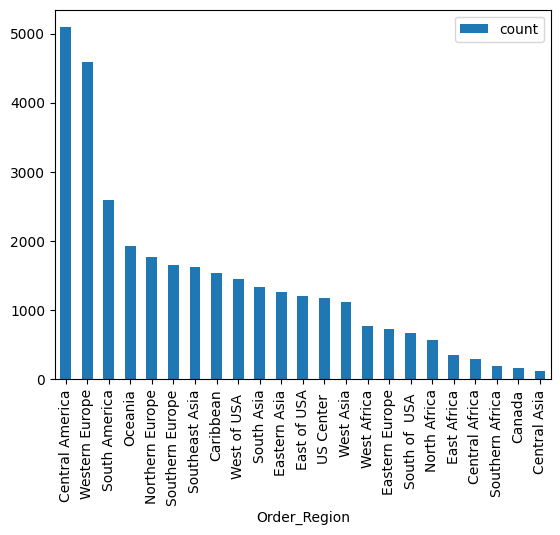

In [67]:
on_time_df.plot(x='Order_Region', y='count', kind='bar')

In [72]:
adv_bool_mask = region_df.Delivery_Status.str.contains('Advance shipping')
adv_df = region_df[adv_bool_mask]

len(adv_df)

23

<Axes: xlabel='Order_Region'>

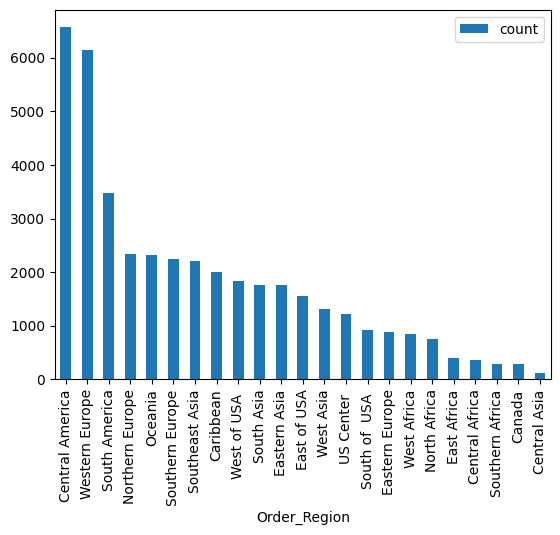

In [76]:
adv_df.plot(x='Order_Region', y='count', kind='bar')

In [71]:
cancel_bool_mask = region_df.Delivery_Status.str.contains('Advance shipping')
cancel_df = region_df[cancel_bool_mask]

len(cancel_df)

23

<Axes: xlabel='Order_Region'>

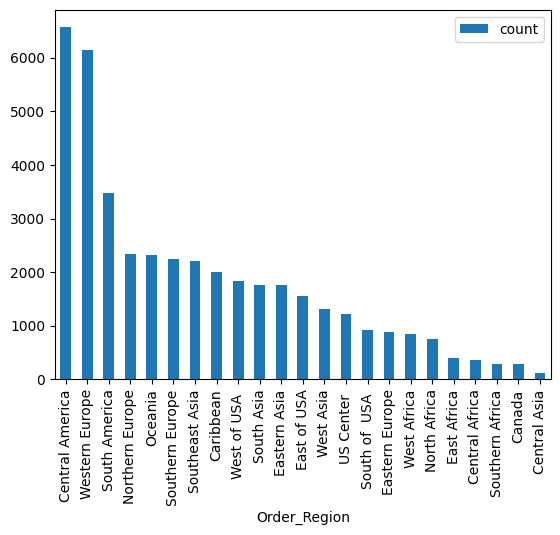

In [77]:
cancel_df.plot(x='Order_Region', y='count', kind='bar')